### Ogólne wprowadzenie

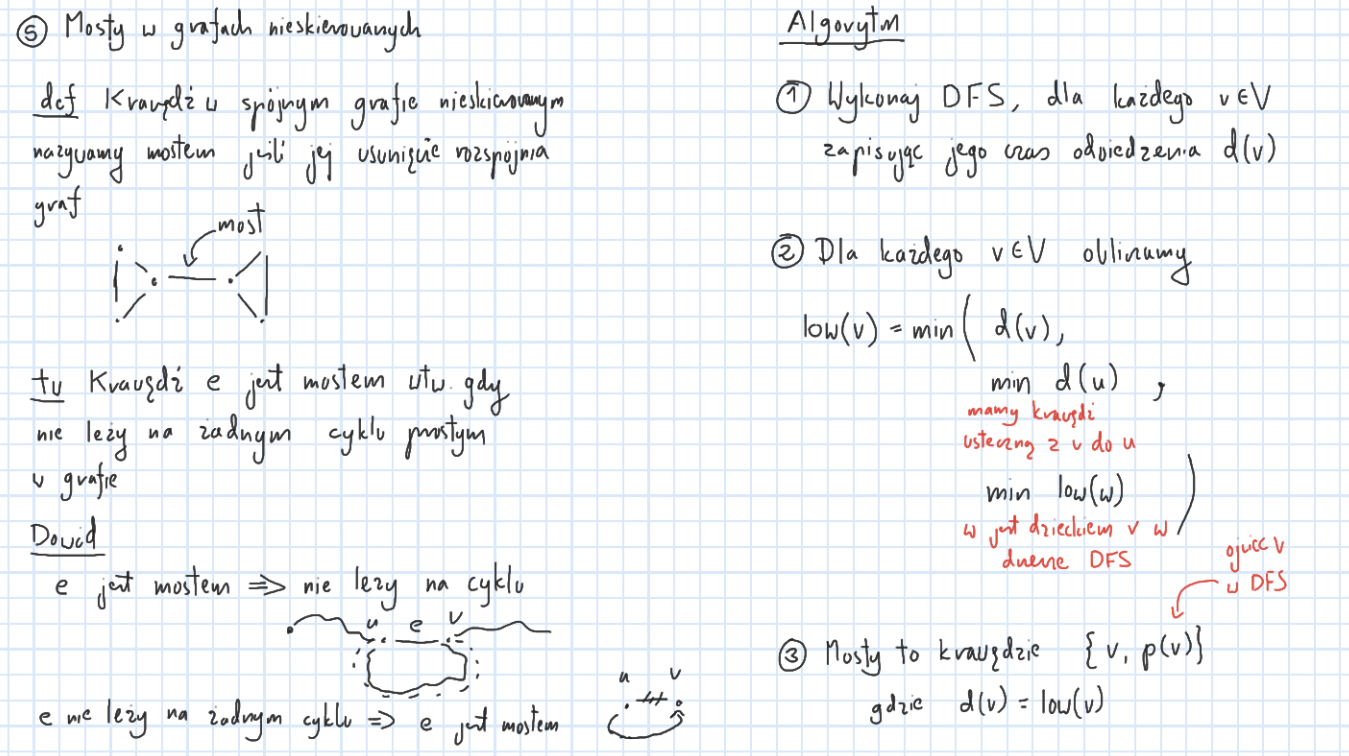
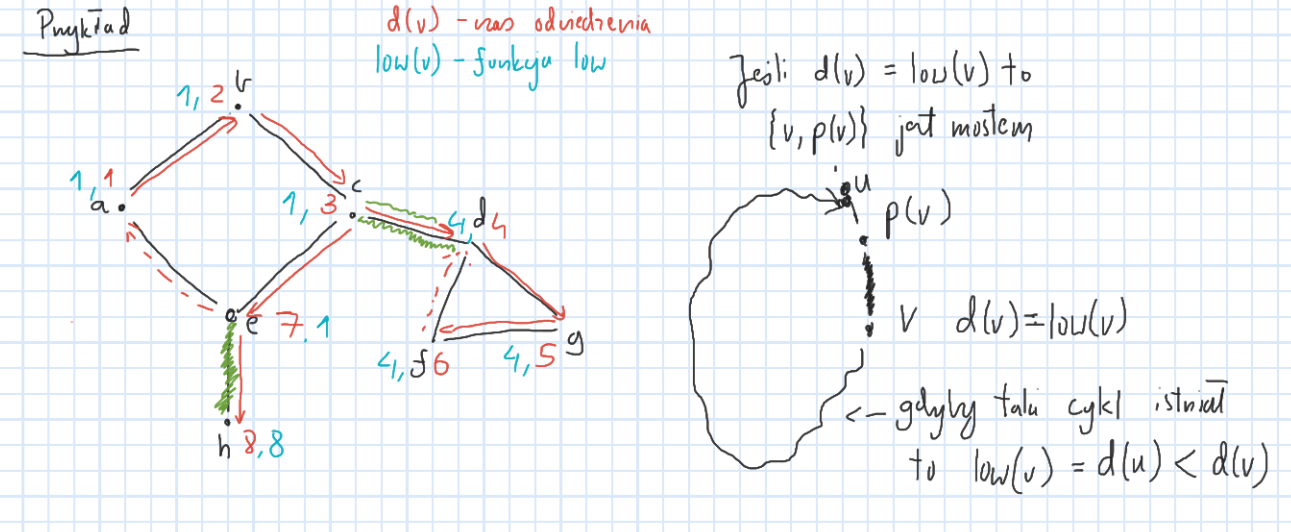

##### Dodatkowe wyjaśnienia i implementacja:

###### LINK: https://youtu.be/09_LlHjoEiY?t=9669

### Złożoność

###### Obliczeniowa:
$ O(V + E) $
###### Pamięciowa:
$ O(V) $ - nie liczę miejsca potrzebnego na graf, który uznaję za dany na wejściu

### Implementacja

In [1]:
def find_bridges(G: 'graph represented by adjacency lists'):
    n = len(G)
    low = [0] * n
    times = [0] * n
    bridges = []
    time = 0
    
    def dfs(u, parent):
        nonlocal time
        time += 1
        low[u] = times[u] = time

        for v in G[u]:
            # when there is no visit time, a vertex hasn't been yet visited
            if not times[v]:
                dfs(v, u)
                # If we have a cycle, we must update the low value of the parent vertex
                if low[v] < low[u]: low[u] = low[v]
            # v cannot be a parent of u as it's obvious it will always be visited before
            # and connected to the vertex u which doesn't imply that we have a back edge
            elif v != parent:  
                # We have a back edge (we try to enter a vertex which was entered before)
                if times[v] < low[u]: low[u] = times[v]
                    
        # We will start from parent -1 as the first vertex has no parent
        if times[u] == low[u] and parent >= 0:
            bridges.append((parent, u))
    # Check all possible starting vertices as a graph doesn't have to be consistent
    for i in range(n):
        if not times[i]:
            dfs(i, -1)

    return bridges


def undirected_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
        G[edge[1]].append(edge[0])
    return G

###### Kilka testów

##### Pomocnicze

In [2]:
from string import ascii_lowercase

def create_graph(*E: 'edges where vertices are lowercase english alphabet letters'):
    E = list(map(lambda edge: tuple(map(lambda u: ord(u) - ord('a'), edge)), E))
    n = len(set(u for edge in E for u in edge))
    G = undirected_graph_list(E, n)
    return G

def print_connections(G: 'graph represented using adjacency lists'):
    n = len(G)
    print(f'Graph (row: {n}):', *map(lambda pair: f'{ascii_lowercase[pair[0]]} -> {", ".join(ascii_lowercase[v] for v in pair[1])}', enumerate(G)), sep='\n')

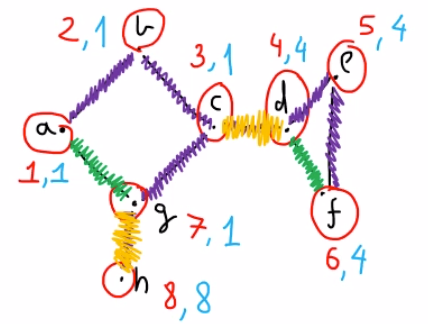

In [3]:
G = create_graph('ab', 'bc', 'cd', 'de', 'ef', 'fd', 'ag', 'cg', 'gh')
print_connections(G)

bridges = find_bridges(G)
print('Bridges:', *map(lambda bridge: tuple(chr(ord('a') + u) for u in bridge), bridges))

Graph (row: 8):
a -> b, g
b -> a, c
c -> b, d, g
d -> c, e, f
e -> d, f
f -> e, d
g -> a, c, h
h -> g
Bridges: ('c', 'd') ('g', 'h')


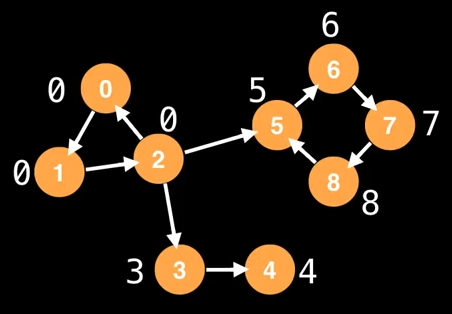
\* Na załączonej ilustracji graf jest skierowany. My jednak tworzymy graf nieskierowany.

In [4]:
E = [(0, 1), (0, 2), (2, 1), (2, 3), (3, 4), (2, 5), (5, 6), (8, 5), (8, 7), (6, 7)]
G = undirected_graph_list(E, 9)

print(*G, sep='\n')
bridges = find_bridges(G)
print('Bridges:', *bridges)

[1, 2]
[0, 2]
[0, 1, 3, 5]
[2, 4]
[3]
[2, 6, 8]
[5, 7]
[8, 6]
[5, 7]
Bridges: (3, 4) (2, 3) (2, 5)


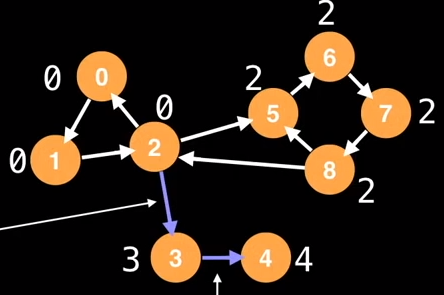
\* Na załączonej ilustracji graf jest skierowany. My jednak tworzymy graf nieskierowany.

In [5]:
E = [(0, 1), (0, 2), (2, 1), (2, 3), (3, 4), (2, 5), (5, 6), (8, 5), (8, 7), (6, 7), (2, 8)]
G = undirected_graph_list(E, 9)

print(*G, sep='\n')
bridges = find_bridges(G)
print('Bridges:', *bridges)

[1, 2]
[0, 2]
[0, 1, 3, 5, 8]
[2, 4]
[3]
[2, 6, 8]
[5, 7]
[8, 6]
[5, 7, 2]
Bridges: (3, 4) (2, 3)


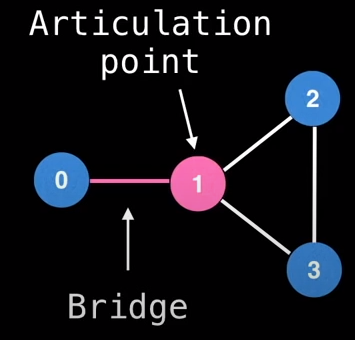

In [6]:
E = [(0, 1), (1, 2), (1, 3), (2, 3)]
G = undirected_graph_list(E, 4)

print(*G, sep='\n')
bridges = find_bridges(G)
print('Bridges:', *bridges)

[1]
[0, 2, 3]
[1, 3]
[1, 2]
Bridges: (0, 1)


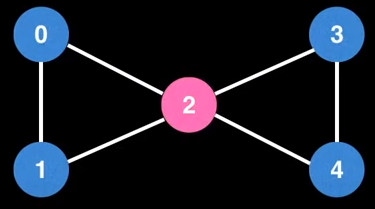

In [7]:
E = [(0, 1), (1, 2), (0, 2), (2, 3), (2, 4), (3, 4)]
G = undirected_graph_list(E, 5)

print(*G, sep='\n')
bridges = find_bridges(G)
print('Bridges:', *bridges)

[1, 2]
[0, 2]
[1, 0, 3, 4]
[2, 4]
[2, 3]
Bridges:


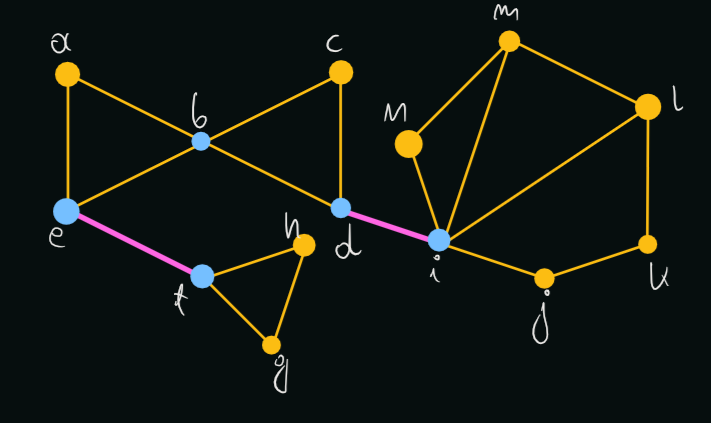

In [8]:
G = create_graph('ae', 'ef', 'fh', 'hg', 'fg', 'ab', 'be', 'bc', 'bd', 'cd', 'di', 'ij', 'in',
                'jk', 'kl', 'il', 'im', 'ml', 'mn')
print_connections(G)

bridges = find_bridges(G)
print('Bridges:', *map(lambda bridge: tuple(chr(ord('a') + u) for u in bridge), bridges))

Graph (row: 14):
a -> e, b
b -> a, e, c, d
c -> b, d
d -> b, c, i
e -> a, f, b
f -> e, h, g
g -> h, f
h -> f, g
i -> d, j, n, l, m
j -> i, k
k -> j, l
l -> k, i, m
m -> i, l, n
n -> i, m
Bridges: ('e', 'f') ('d', 'i')


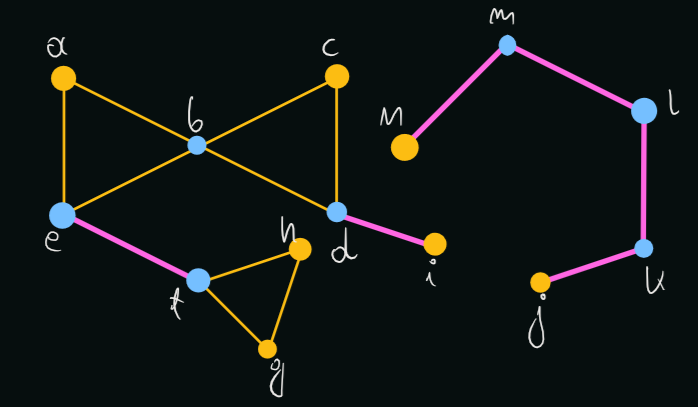

In [9]:
G = create_graph('ae', 'ef', 'fh', 'hg', 'fg', 'ab', 'be', 'bc', 'bd', 'cd', 'di',
                'jk', 'kl', 'ml', 'mn')
print_connections(G)

bridges = find_bridges(G)
print('Bridges:', *map(lambda bridge: tuple(chr(ord('a') + u) for u in bridge), bridges))

Graph (row: 14):
a -> e, b
b -> a, e, c, d
c -> b, d
d -> b, c, i
e -> a, f, b
f -> e, h, g
g -> h, f
h -> f, g
i -> d
j -> k
k -> j, l
l -> k, m
m -> l, n
n -> m
Bridges: ('e', 'f') ('d', 'i') ('m', 'n') ('l', 'm') ('k', 'l') ('j', 'k')


In [10]:
G = [
    [1, 2, 3],
    [0, 2],
    [0, 1],
    [0, 4],
    [3]
]

print(find_bridges(G))

[(3, 4), (0, 3)]


## (Dodatkowo) Znajdowanie punktów artykulacji w grafie

Algorytm można łatwo uzyskać, poprzez modyfikację algorytmu przedstawionego wyżej, służącego do znajdowania mostów. Dokładne wyjaśnienie w wideo niżej.
###### LINK: https://youtu.be/09_LlHjoEiY?t=9801

### Implementacja

In [11]:
def find_articulation_points(G: 'graph represented by adjacency lists'):
    n = len(G)
    low    = [0] * n
    times  = [0] * n
    is_art = [False] * n
    time   = 0
    
    def dfs(root, u, parent):
        nonlocal time
        time += 1
        low[u] = times[u] = time
        out_deg = 0
        
        for v in G[u]:
            if v == parent: continue
            if not times[v]:
                out_deg += dfs(root, v, u) + u == root
                low[u] = min(low[u], low[v])
                if times[u] <= low[v]:
                    is_art[u] = True
            else:
                low[u] = min(low[u], times[v])
        
        return out_deg
                
    # Check all possible starting vertices as a graph doesn't have to be consistent
    for u in range(n):
        if not times[u]:
            is_art[u] = dfs(u, u, -1) > 1

    return [u for u in range(n) if is_art[u]]


def undirected_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
        G[edge[1]].append(edge[0])
    return G

###### Kilka testów

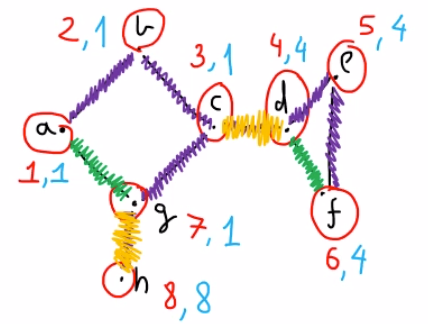

In [12]:
G = create_graph('ab', 'bc', 'cd', 'de', 'ef', 'fd', 'ag', 'cg', 'gh')
print_connections(G)

result = find_articulation_points(G)
print('Points:', *map(lambda u: chr(ord('a') + u), result))

Graph (row: 8):
a -> b, g
b -> a, c
c -> b, d, g
d -> c, e, f
e -> d, f
f -> e, d
g -> a, c, h
h -> g
Points: c d g


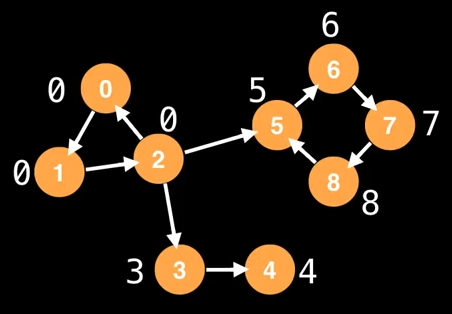
\* Na załączonej ilustracji graf jest skierowany. My jednak tworzymy graf nieskierowany.

In [13]:
E = [(0, 1), (0, 2), (2, 1), (2, 3), (3, 4), (2, 5), (5, 6), (8, 5), (8, 7), (6, 7)]
G = undirected_graph_list(E, 9)

print(*G, sep='\n')
result = find_articulation_points(G)
print('Points:', *result)

[1, 2]
[0, 2]
[0, 1, 3, 5]
[2, 4]
[3]
[2, 6, 8]
[5, 7]
[8, 6]
[5, 7]
Points: 2 3 5


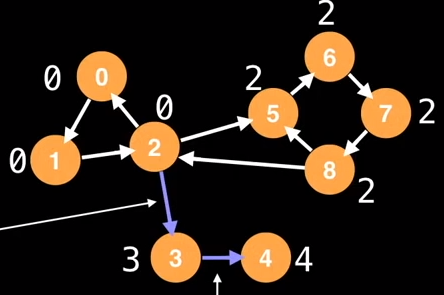
\* Na załączonej ilustracji graf jest skierowany. My jednak tworzymy graf nieskierowany.

In [14]:
E = [(0, 1), (0, 2), (2, 1), (2, 3), (3, 4), (2, 5), (5, 6), (8, 5), (8, 7), (6, 7), (2, 8)]
G = undirected_graph_list(E, 9)

print(*G, sep='\n')
result = find_articulation_points(G)
print('Points:', *result)

[1, 2]
[0, 2]
[0, 1, 3, 5, 8]
[2, 4]
[3]
[2, 6, 8]
[5, 7]
[8, 6]
[5, 7, 2]
Points: 2 3


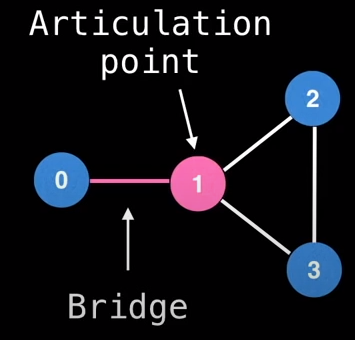

In [15]:
E = [(0, 1), (1, 2), (1, 3), (2, 3)]
G = undirected_graph_list(E, 4)

print(*G, sep='\n')
result = find_articulation_points(G)
print('Points:', *result)

[1]
[0, 2, 3]
[1, 3]
[1, 2]
Points: 1


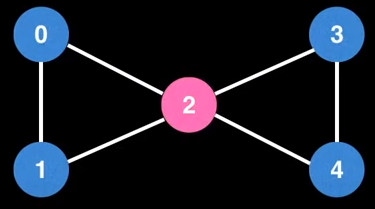

In [16]:
E = [(0, 1), (1, 2), (0, 2), (2, 3), (2, 4), (3, 4)]
G = undirected_graph_list(E, 5)

print(*G, sep='\n')
result = find_articulation_points(G)
print('Points:', *result)

[1, 2]
[0, 2]
[1, 0, 3, 4]
[2, 4]
[2, 3]
Points: 2


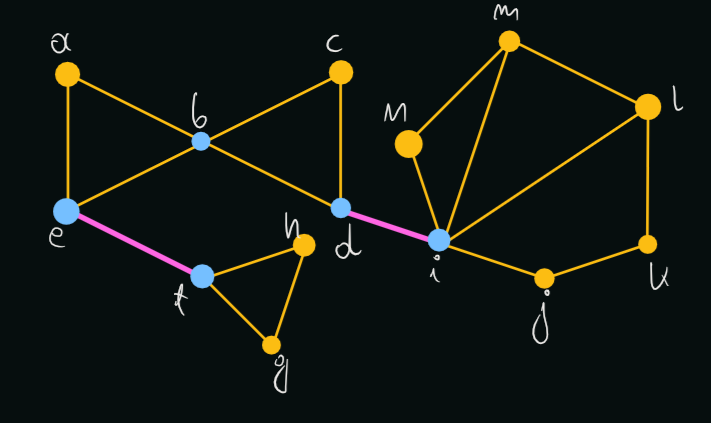

In [17]:
G = create_graph('ae', 'ef', 'fh', 'hg', 'fg', 'ab', 'be', 'bc', 'bd', 'cd', 'di', 'ij', 'in',
                'jk', 'kl', 'il', 'im', 'ml', 'mn')
print_connections(G)

result = find_articulation_points(G)
print('Points:', *map(lambda u: chr(ord('a') + u), result))

Graph (row: 14):
a -> e, b
b -> a, e, c, d
c -> b, d
d -> b, c, i
e -> a, f, b
f -> e, h, g
g -> h, f
h -> f, g
i -> d, j, n, l, m
j -> i, k
k -> j, l
l -> k, i, m
m -> i, l, n
n -> i, m
Points: b d e f i


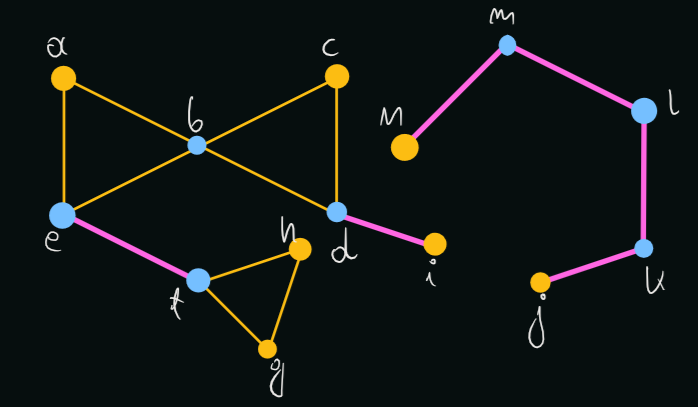

In [18]:
G = create_graph('ae', 'ef', 'fh', 'hg', 'fg', 'ab', 'be', 'bc', 'bd', 'cd', 'di',
                'jk', 'kl', 'ml', 'mn')
print_connections(G)

result = find_articulation_points(G)
print('Points:', *map(lambda u: chr(ord('a') + u), result))

Graph (row: 14):
a -> e, b
b -> a, e, c, d
c -> b, d
d -> b, c, i
e -> a, f, b
f -> e, h, g
g -> h, f
h -> f, g
i -> d
j -> k
k -> j, l
l -> k, m
m -> l, n
n -> m
Points: b d e f k l m


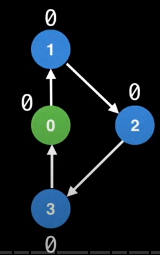

In [19]:
E = [(0, 1), (1, 2), (2, 3), (3, 0)]
G = undirected_graph_list(E, 4)

print(*G, sep='\n')
result = find_articulation_points(G)
print('Points:', *result)

[1, 3]
[0, 2]
[1, 3]
[2, 0]
Points:


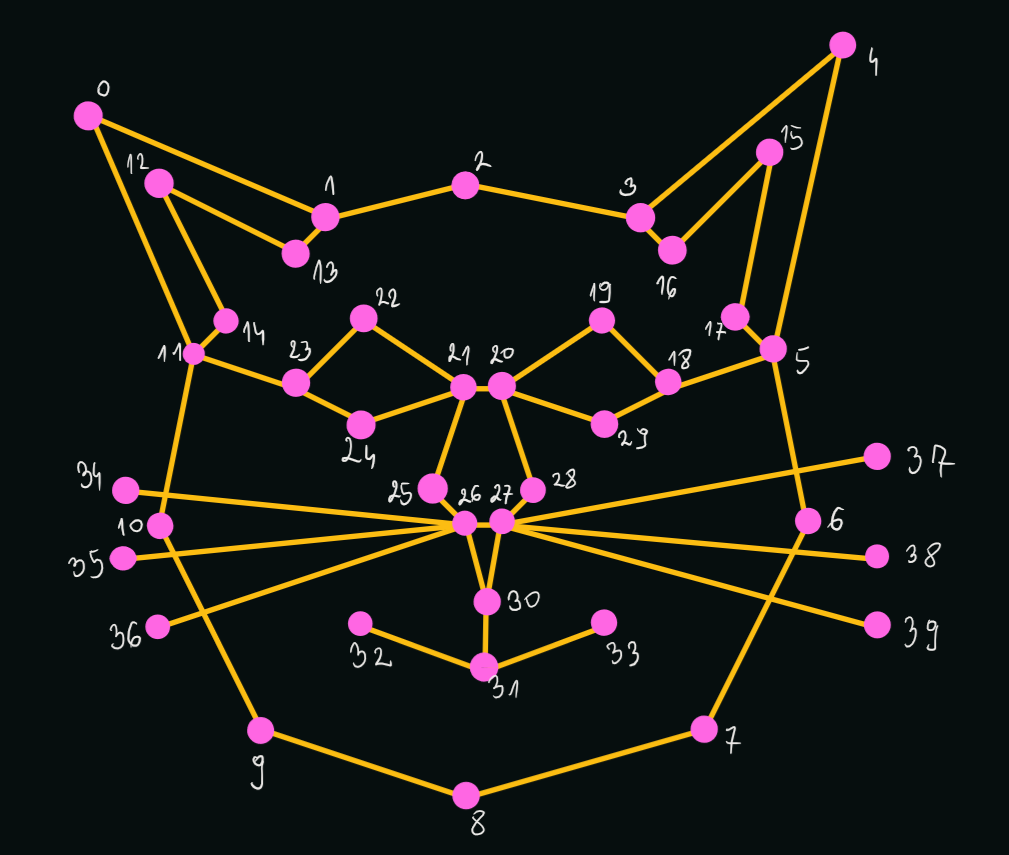

In [20]:
E = [*((i, i+1) for i in range(11)), (11, 0), (11, 14), (14, 12), (12, 13), (13, 1), (3, 16), (16, 15),
     (15, 17), (17, 5), (11, 23), (23, 22), (22, 21), (21, 24), (24, 23), (21, 20), (20, 19), (19, 18),
     (18, 29), (29, 20), (18, 5), (21, 25), (25, 26), (26, 27), (27, 28), (28, 20), (26, 30), (30, 27),
     (30, 31), (31, 32), (31, 33), (34, 26), (35, 26), (36, 26), (27, 37), (27, 38), (27, 39)]
n = len(set(v for edge in E for v in edge))
G = undirected_graph_list(E, n)

print(*G, sep='\n')
result = find_articulation_points(G)
print('Points:', *result)

[1, 11]
[0, 2, 13]
[1, 3]
[2, 4, 16]
[3, 5]
[4, 6, 17, 18]
[5, 7]
[6, 8]
[7, 9]
[8, 10]
[9, 11]
[10, 0, 14, 23]
[14, 13]
[12, 1]
[11, 12]
[16, 17]
[3, 15]
[15, 5]
[19, 29, 5]
[20, 18]
[21, 19, 29, 28]
[22, 24, 20, 25]
[23, 21]
[11, 22, 24]
[21, 23]
[21, 26]
[25, 27, 30, 34, 35, 36]
[26, 28, 30, 37, 38, 39]
[27, 20]
[18, 20]
[26, 27, 31]
[30, 32, 33]
[31]
[31]
[26]
[26]
[26]
[27]
[27]
[27]
Points: 26 27 30 31
